In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# loading data

In [17]:
data=pd.read_csv("bank-full.csv",sep=";")


In [18]:
numeric_colummns=data.select_dtypes(include=np.number).columns
columns=data.columns

categorical_columns=[]

for c in columns:
    if c not in numeric_colummns:
        categorical_columns.append(c)

In [19]:
numeric_colummns.dtype

dtype('O')

In [20]:
print(f"There are total columns are {columns.shape[0]} out of them numeric columns are {numeric_colummns.shape[0]} , catagorical columns are {len(categorical_columns)} ")

There are total columns are 17 out of them numeric columns are 7 , catagorical columns are 10 


In [21]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [22]:
data.shape

(45211, 17)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [24]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# EDA

marital   y  
divorced  no     0.880545
          yes    0.119455
married   no     0.898765
          yes    0.101235
single    no     0.850508
          yes    0.149492
Name: proportion, dtype: float64

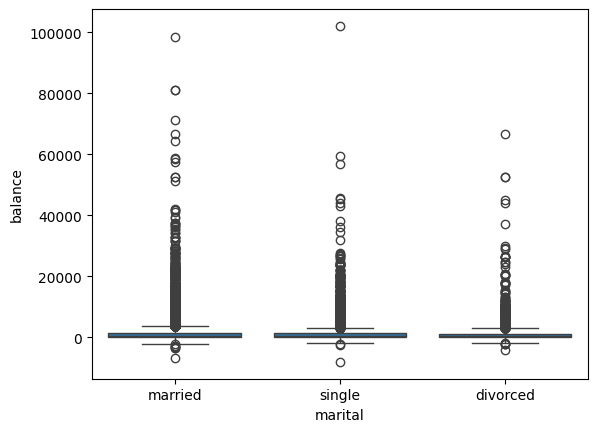

In [33]:
sns.boxplot(x='marital', y='balance', data=data)
data.groupby('marital')['y'].value_counts(normalize=True)


## normalizing data

In [36]:
def normalize(df):

    for c in df.select_dtypes(include=np.number).columns:
        df[c]=(df[c]-df[c].min()/(df[c].max()-df[c].min()))

    return df    

In [37]:
data=normalize(data)

In [40]:
def count_outlier(df,c):
    IQR=df.describe().at['75%',c]-df.describe().at['25%',c]
    max=df.describe().at['75%',c]+(1.5*IQR)
    min=df.describe().at['25%',c]-(1.5*IQR)
    count=0

    for i in df[c]:
        if  i<min or i>max:
            count=count+1

    return count        



In [41]:
for c in numeric_colummns:
    print(c,"\t",count_outlier(data,c))

age 	 487
balance 	 4729
day 	 0
duration 	 3235
campaign 	 3064
pdays 	 8257
previous 	 8257


## distribution

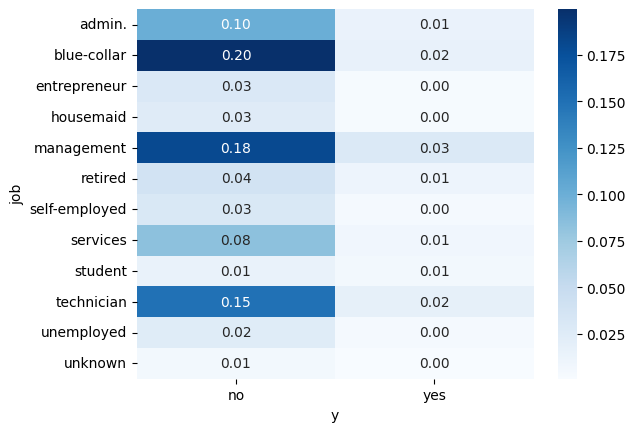

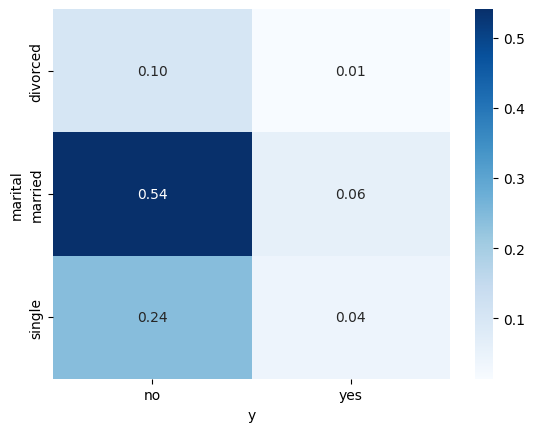

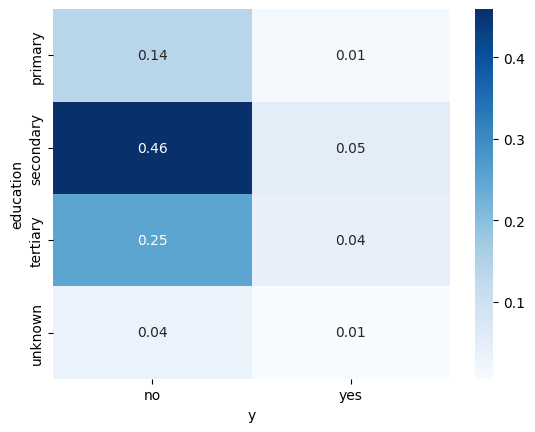

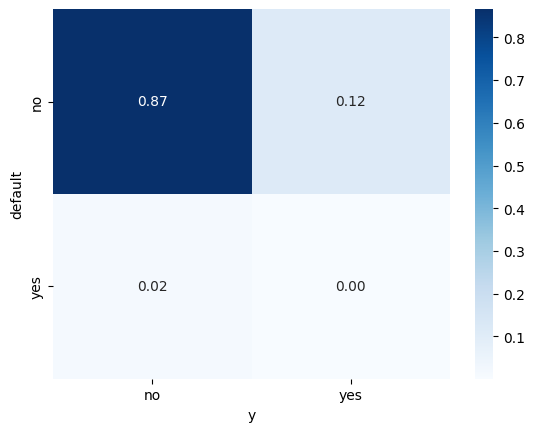

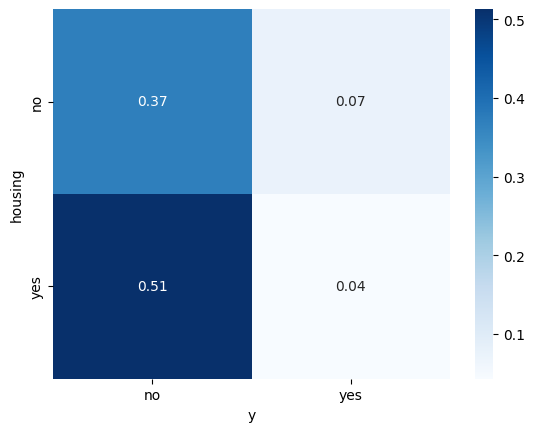

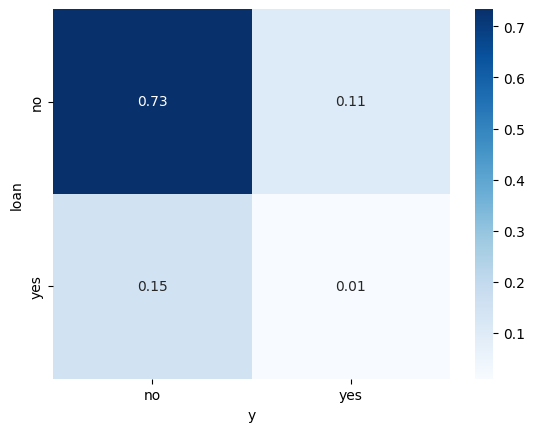

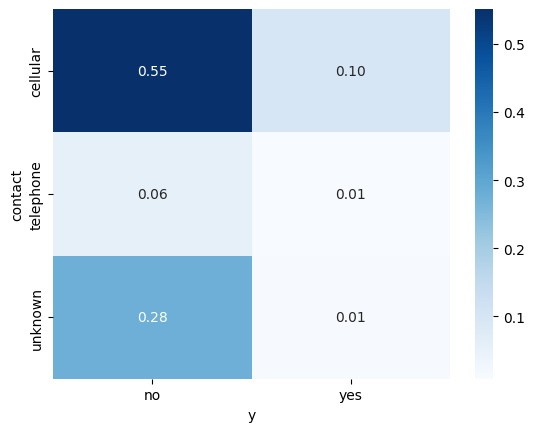

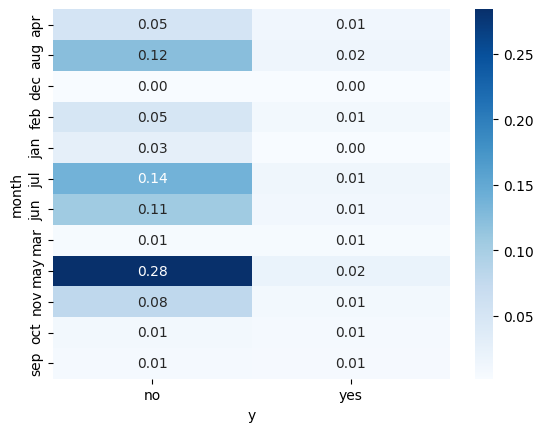

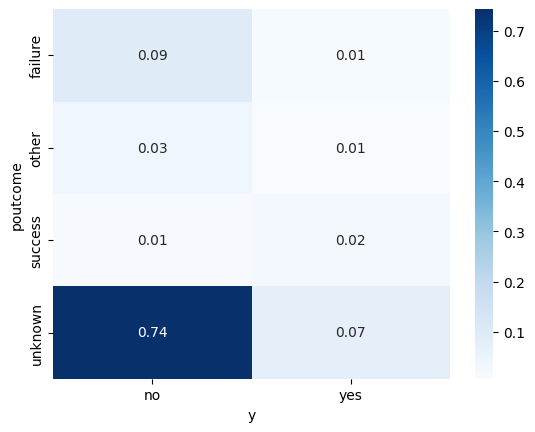

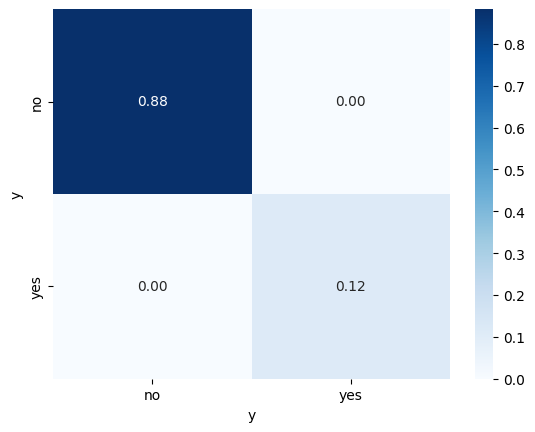

In [55]:
for c in categorical_columns:    
    crosstab=pd.crosstab(data[c], data['y'],normalize=True)
    sns.heatmap(crosstab, annot=True, fmt='.2f', cmap='Blues')
    plt.show()


## plots

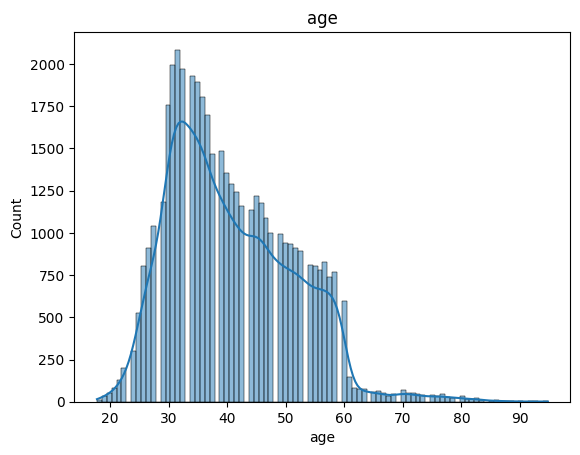

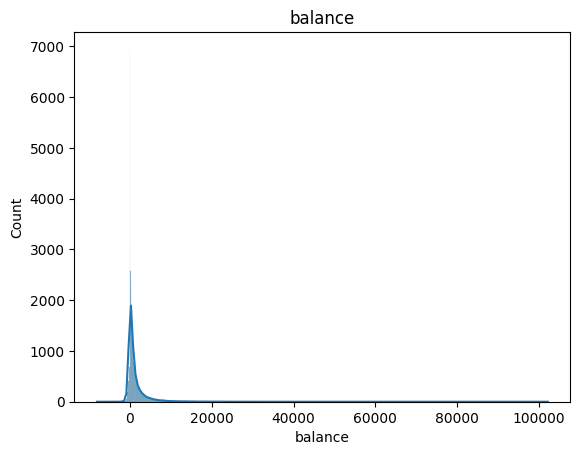

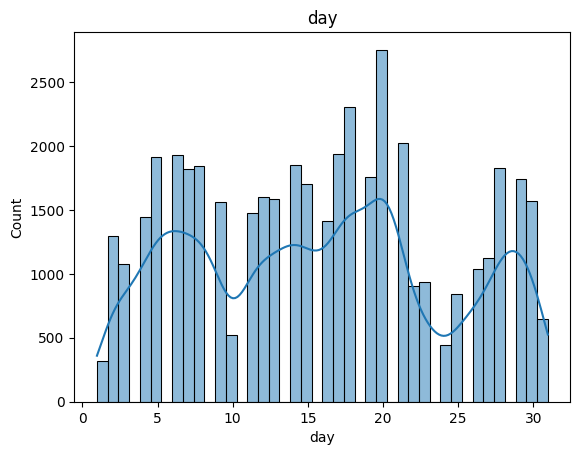

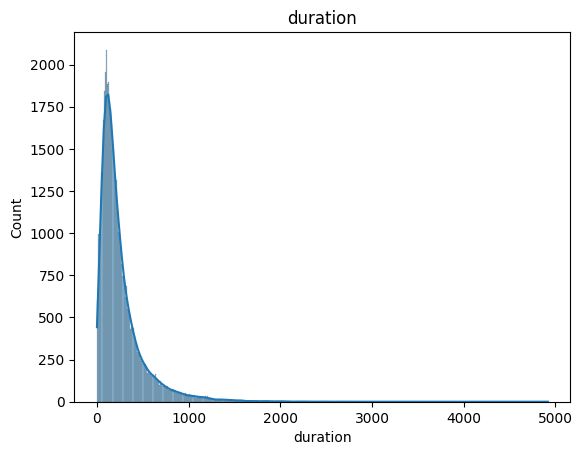

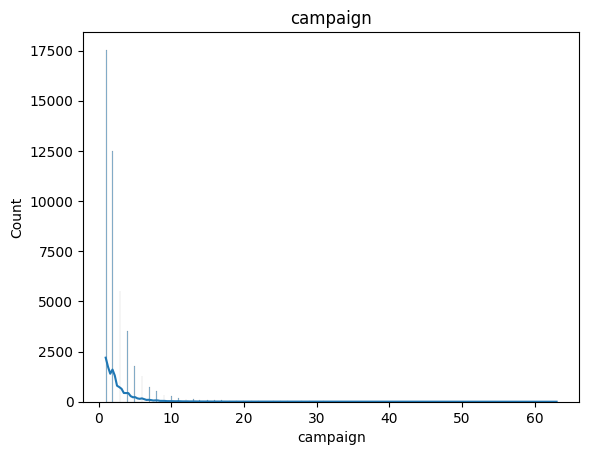

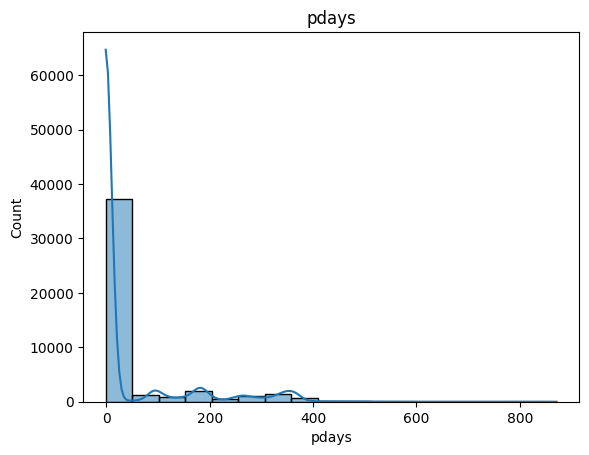

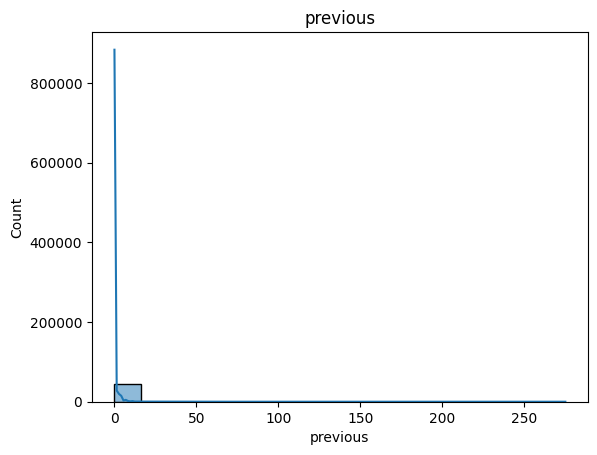

In [42]:
for col in numeric_colummns:
    sns.histplot(data[col], kde=True)
    plt.title(col)
    plt.show()
    

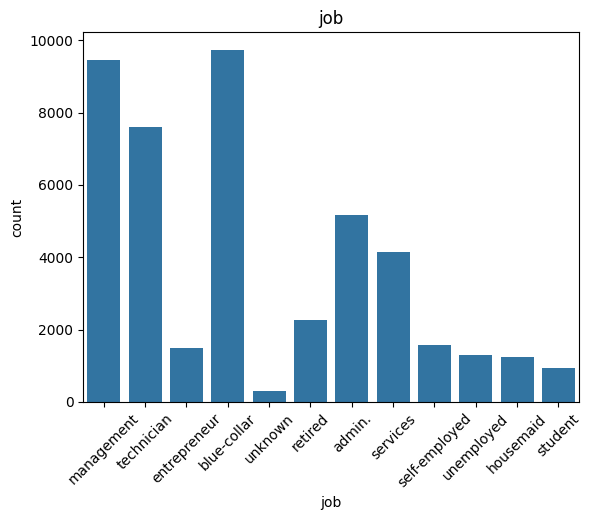

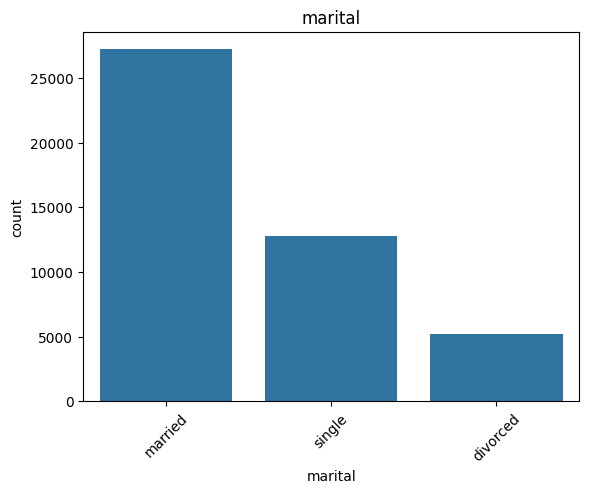

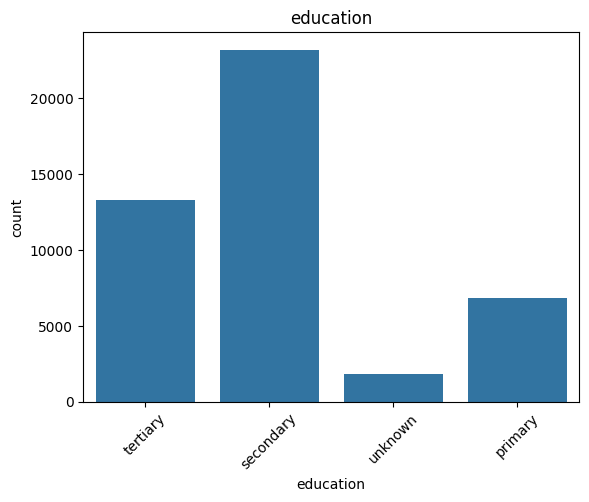

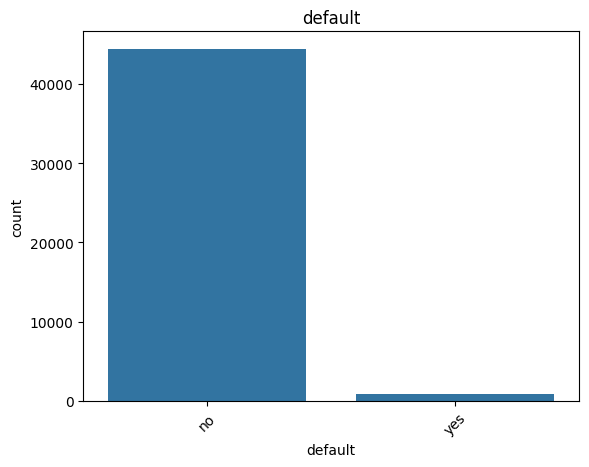

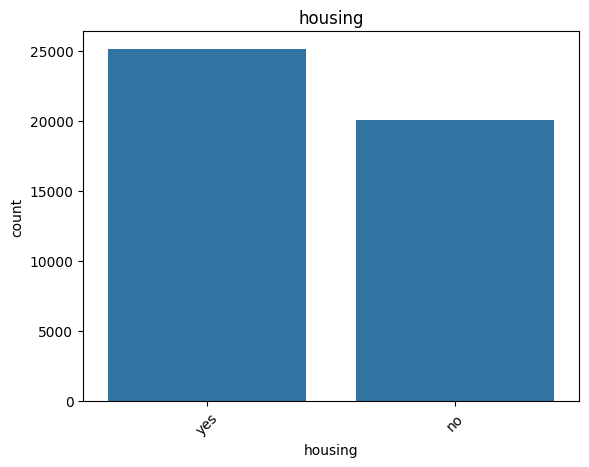

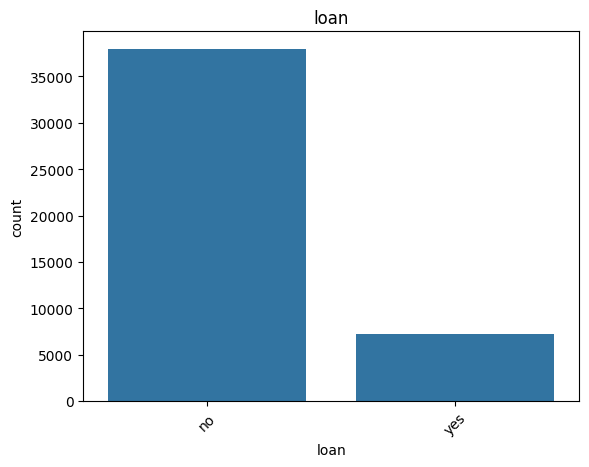

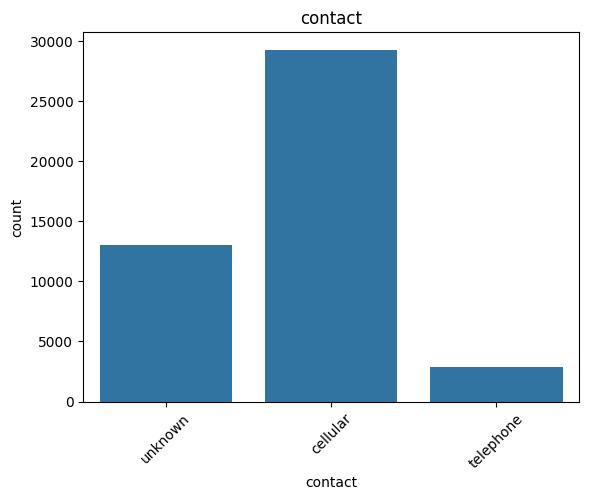

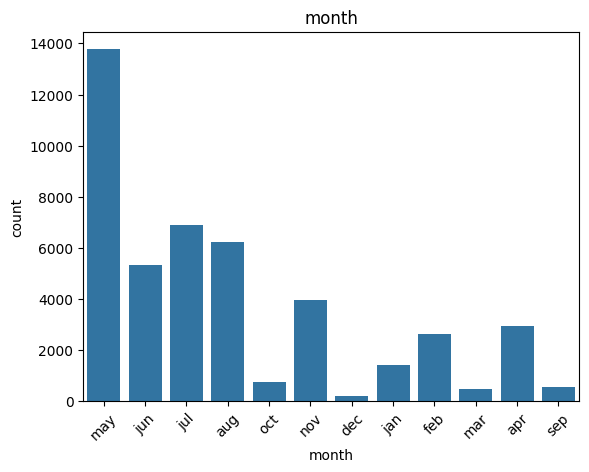

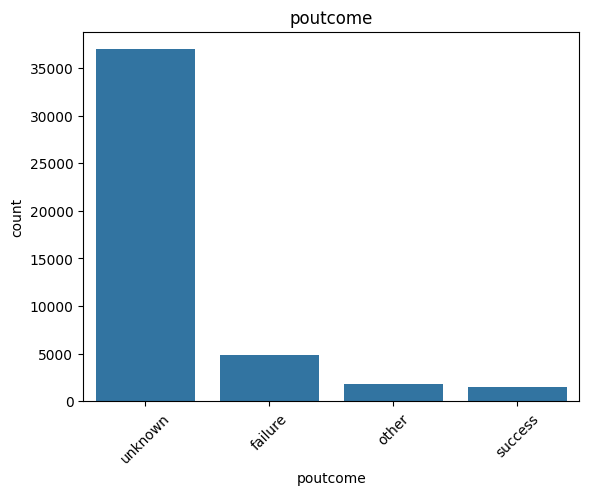

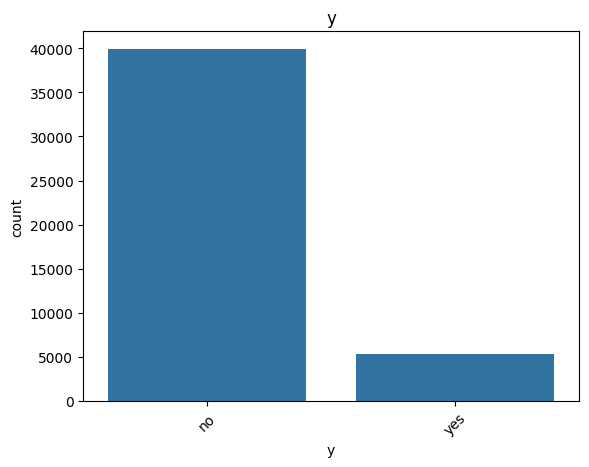

In [43]:
for col in categorical_columns:
        sns.countplot(x=data[col])
        plt.title(col)
        plt.xticks(rotation=45)
        plt.show()


## correlation

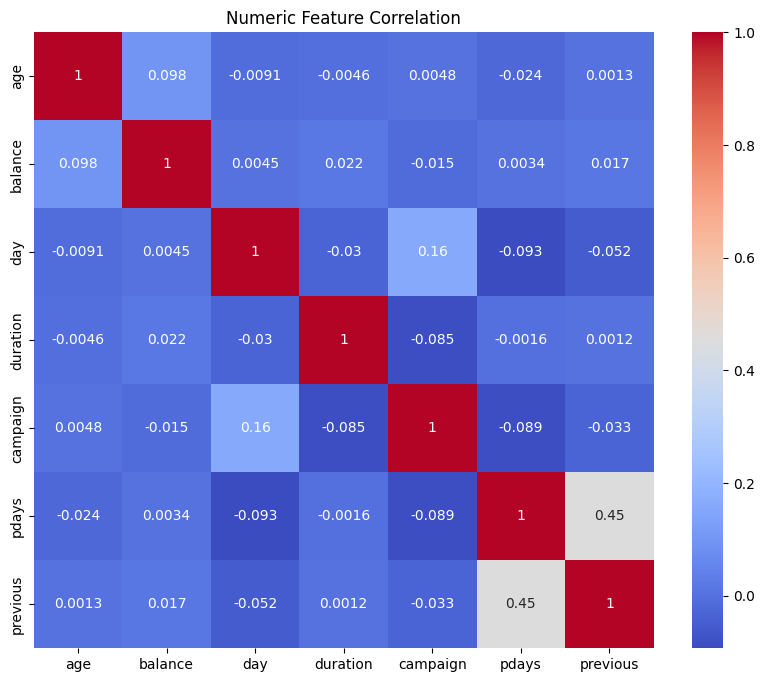

In [44]:
corr_matrix = data[numeric_colummns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Numeric Feature Correlation")
plt.show()


In [61]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


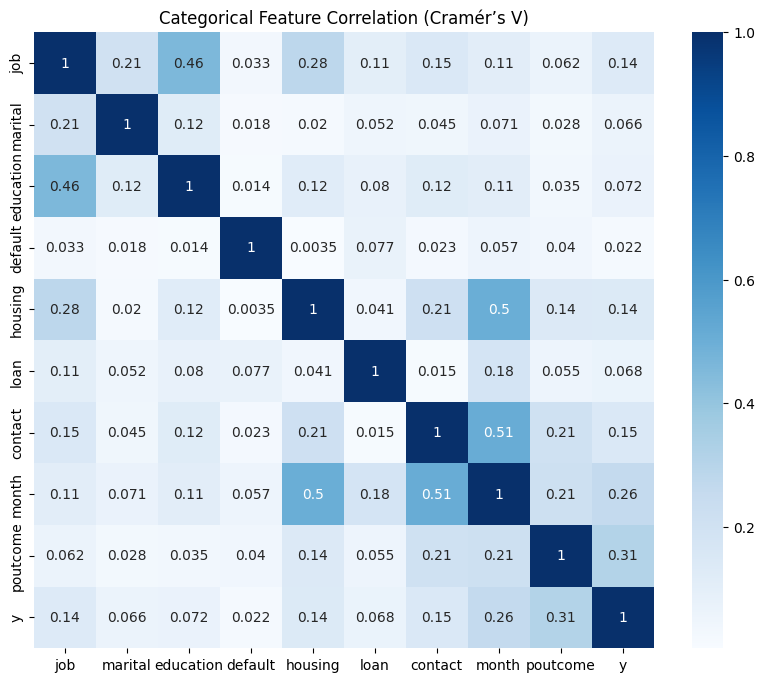

In [73]:
cat_corr = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
for col1 in categorical_columns:
    for col2 in categorical_columns:
        cat_corr.loc[col1, col2] = cramers_v(data[col1], data[col2])

cat_corr = cat_corr.astype(float)

plt.figure(figsize=(10,8))
sns.heatmap(cat_corr, annot=True, cmap='Blues')
plt.title("Categorical Feature Correlation (Cramér’s V)")
plt.show()


In [48]:
target="y"

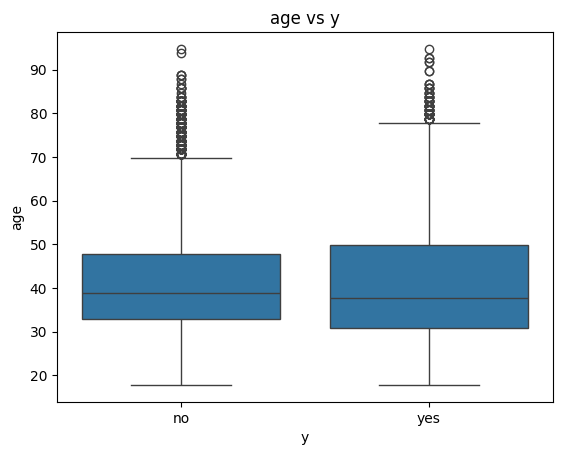

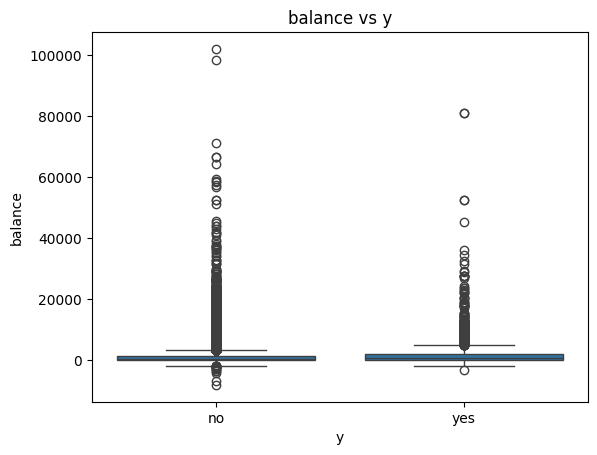

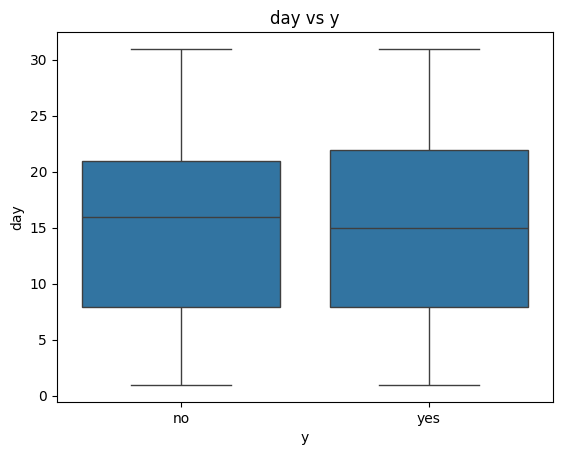

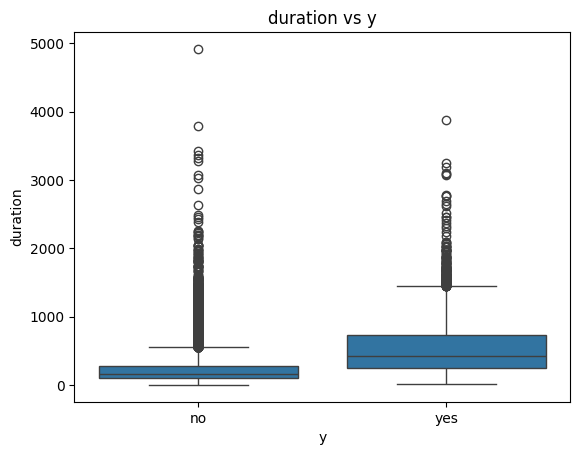

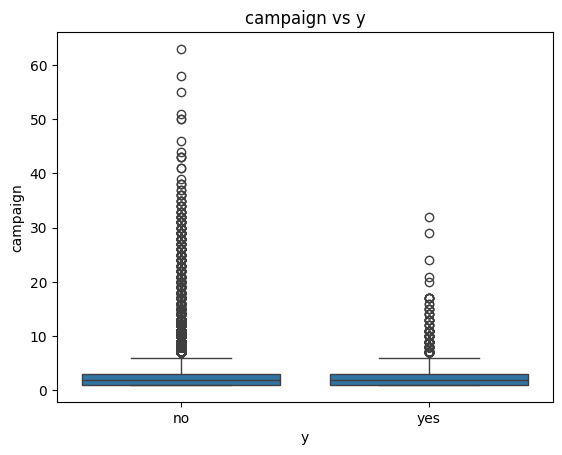

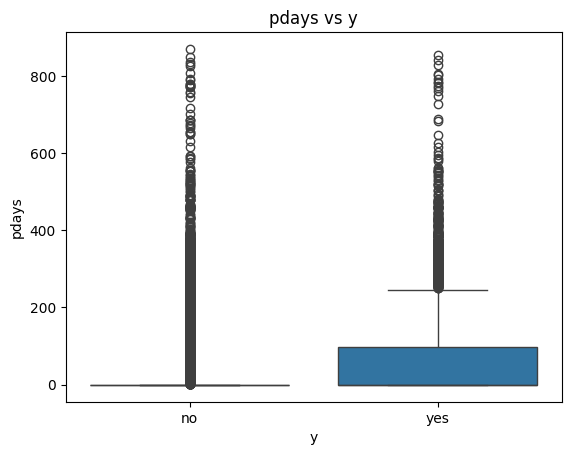

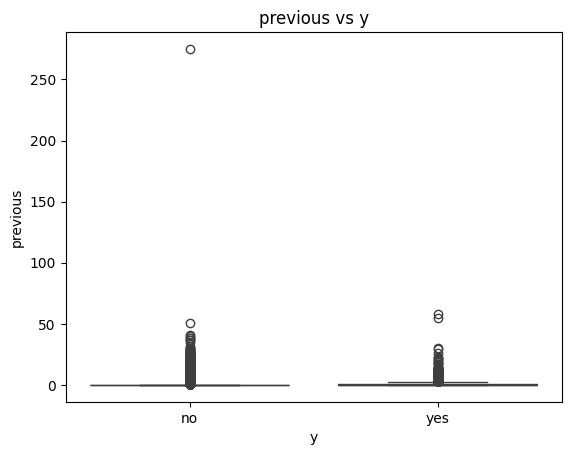

In [49]:
for col in numeric_colummns:
    sns.boxplot(x=target, y=col, data=data)
    plt.title(f"{col} vs {target}")
    plt.show()


## mapping and encoding

In [239]:
def one_hot_encode_labels(labels):
    """
    One-hot encode categorical string labels.
    Example: ['cat', 'dog', 'fish', 'cat']
    """
    unique_labels = sorted(set(labels))
    label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
    
    encoded = np.zeros((len(labels), len(unique_labels)))
    for i, label in enumerate(labels):
        encoded[i, label_to_index[label]] = 1
    return encoded, label_to_index


In [240]:
for c in categorical_columns :
        print(c,"--->",data[c].unique())

job ---> ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ---> ['married' 'single' 'divorced']
education ---> ['tertiary' 'secondary' 'unknown' 'primary']
default ---> ['no' 'yes']
housing ---> ['yes' 'no']
loan ---> ['no' 'yes']
contact ---> ['unknown' 'cellular' 'telephone']
month ---> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome ---> ['unknown' 'failure' 'other' 'success']
y ---> ['no' 'yes']


In [241]:
for c in ["default","housing","loan","y"]:
    data[c].replace({"no":0,"yes":1},inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14808\3397157919.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[c].replace({"no":0,"yes":1},inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14808\3397157919.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[c].replace({"no":0,"ye

In [242]:
for c in  ["default","housing","loan","y"] :
        print(c,"--->",data[c].unique())

default ---> [0 1]
housing ---> [1 0]
loan ---> [0 1]
y ---> [0 1]


In [243]:
data = pd.get_dummies(data, columns=["job","marital","education","contact","month","poutcome"])

In [244]:
data.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [245]:
for c in ['job_admin.', 'job_blue-collar','job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired','job_self-employed', 'job_services', 'job_student', 'job_technician','job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married','marital_single', 'education_primary', 'education_secondary','education_tertiary', 'education_unknown', 'contact_cellular','contact_telephone', 'contact_unknown', 'month_apr', 'month_aug','month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun','month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep','poutcome_failure', 'poutcome_other', 'poutcome_success','poutcome_unknown']:
    data[c]=data[c].replace({"False":0,"True":1})

In [246]:
data = data.astype(int)

In [247]:
data.head(5)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


# slpit

In [128]:
df_shuffled = data.sample(frac=1, random_state=42).reset_index(drop=True)

split_index = int(0.8 * len(df_shuffled))
train_df = df_shuffled.iloc[:split_index]
test_df = df_shuffled.iloc[split_index:]


X_train = train_df.drop(columns=['y'])
y_train = (train_df['y'] == 'yes')

X_test = test_df.drop(columns=['y'])
y_test = (test_df['y'] == 'yes')

# model

In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function with L2 regularization
def compute_cost(X, y, w, lambda_):
    m = len(y)
    predictions = sigmoid(np.dot(X, w))
    cost = - (1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    # Add regularization term
    cost += (lambda_ / (2 * m)) * np.sum(w[1:]**2)  
    return cost

def gradient_descent(X, y, w, learning_rate, iterations, lambda_):
    m = len(y)
    costs = []

    for _ in range(iterations):
        predictions = sigmoid(np.dot(X, w))
        gradient = (1/m) * np.dot(X.T, (predictions - y))
        gradient[1:] += (lambda_ / m) * w[1:]
        w -= learning_rate * gradient
        
        cost = compute_cost(X, y, w, lambda_)
        costs.append(cost)

    return w, costs

# Logistic Regression from scratch with regularization
def logistic_regression(X, y, learning_rate=0.01, iterations=1000, lambda_=0.1):
    m, n = X.shape
    X = np.hstack((np.ones((m, 1)), X))

    w = np.zeros(n + 1)

    w, costs = gradient_descent(X, y, w, learning_rate, iterations, lambda_)
    
    return w, costs

# Prediction function
def predict(X, w):
    m = len(X)
    X = np.hstack((np.ones((m, 1)), X))  
    predictions = sigmoid(np.dot(X, w))
    return [1 if p >= 0.5 else 0 for p in predictions]




## Evaluation metrics

In [201]:

def evaluate(y_true, y_pred, name="Model"):
    accuracy = np.mean(y_true == y_pred)
    precision_list, recall_list, f1_list = [], [], []

    for c in np.unique(y_true):
        tp = np.sum((y_pred == c) & (y_true == c))
        fp = np.sum((y_pred == c) & (y_true != c))
        fn = np.sum((y_pred != c) & (y_true == c))

        precision = tp / (tp + fp + 1e-9)
        recall = tp / (tp + fn + 1e-9)
        f1 = 2 * precision * recall / (precision + recall + 1e-9)

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

    accuracy_score,precision_score,recall_score,f1_score=accuracy,np.mean(precision_list),np.mean(recall_list),np.mean(f1_list)

    return accuracy_score,precision_score,recall_score,f1_score


# running model

In [212]:
W,loss_history=logistic_regression(X_train,y_train,learning_rate=0.1,iterations=200)

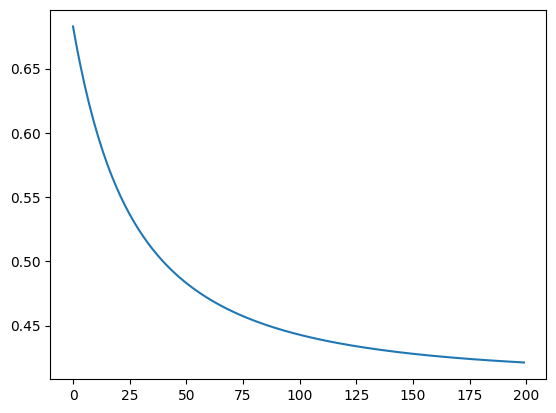

In [214]:
plt.plot(loss_history)
plt.show()

In [215]:
accuracy_score,precision_score,recall_score,f1_score=evaluate(y_test,predict(X_test,W))

In [216]:
accuracy_score,precision_score,recall_score,f1_score

(np.float64(0.8133333333333334),
 np.float64(0.8138632409954878),
 np.float64(0.8128584767186049),
 np.float64(0.8130341875289622))